In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed, randrange
from scipy import stats
from functions1 import *
%matplotlib inline
seed=1



/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


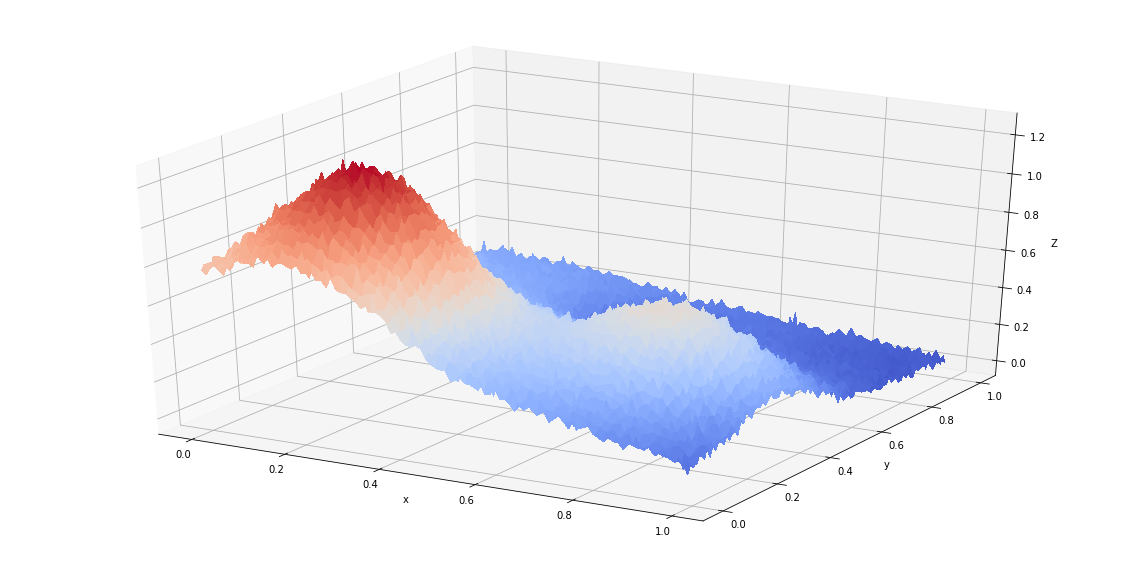

In [2]:
x = np.arange(0, 1, 0.01)
y = np.arange(0, 1, 0.01)
#x = np.random.rand(100,1)
#y = np.random.rand(100,1)
#print(x)
#print(y)
x, y = np.meshgrid(x,y)
z = FrankeFunction(x, y) +0.02*np.random.randn(100,100)
fig=plotTheSurface(x,y,z)
fig.show()
#fig.savefig('Franke.png',DPI=(200))


#OSL regression




In [3]:
#transforming to a coluum vector in order to form an x_hat matrix
xVector=np.matrix.flatten(x)
yVector=np.matrix.flatten(y)
#vectorSize=np.size(yVector,0)
zVector=np.matrix.flatten(z)
sizeVector=np.size(zVector)
matrixSize=np.size(y,0)


In [ ]:
indeces1=np.linspace(0,sizeVector-1,sizeVector)
train1,test1=train_test_split(indeces1, 0.7)
train1=train1.astype(int)
test1=test1.astype(int)
beta,Xinv=OSLregression(xVector[train1],yVector[train1],zVector[train1],3)
zPredict=computeZpredict(xVector[test1],yVector[test1],beta,3)
print(MSE(zVector[test1],zPredict))
print(r2score(zVector[test1],zPredict))

In [ ]:
print(beta)
CI=cofidentint(Xinv,zVector[test1],zPredict,beta)
print(CI)

In [4]:

 
# test cross validation split
indeces=np.linspace(0,sizeVector-1,sizeVector)
indeces=indeces.astype(int)
numberOfFolds=10
folds = k_folds_CV(indeces, numberOfFolds)

polynom_oders=[3,4,5]

In [ ]:
print(sizeVector)

In [5]:
zPredictmatrix,statsMatrix,betaMatrix=olsModel(polynom_oders,xVector,yVector,zVector,numberOfFolds,folds,indeces)


Bias^2 for the final model is: 0.0024595234247869447
Var for the final model is: 8.659382915599446e-07
STATS of MSE for polynom order 3 is:
DescribeResult(nobs=10, minmax=(0.00770276051033371, 0.008446675044225999), mean=0.008147495501017007, variance=7.764122928794498e-08, skewness=-0.3682037054058293, kurtosis=-1.4485152784058994)
STATS of R2score for polynom order 3 is:
DescribeResult(nobs=10, minmax=(0.8965314042015343, 0.9046764644785145), mean=0.9016113772830231, variance=7.471111099543858e-06, skewness=-0.599233587867623, kurtosis=-0.8871790808981319)


STATS of MSE for polynom order 4 is:
DescribeResult(nobs=10, minmax=(0.0039700447857499285, 0.004632807001684479), mean=0.004374866572970731, variance=3.4441385417630347e-08, skewness=-0.8189142921276753, kurtosis=0.38409640306199666)
STATS of R2score for polynom order 4 is:
DescribeResult(nobs=10, minmax=(0.9432467385353179, 0.9503979267094763), mean=0.9471611342479328, variance=4.778919931364445e-06, skewness=-0.093961743505291

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


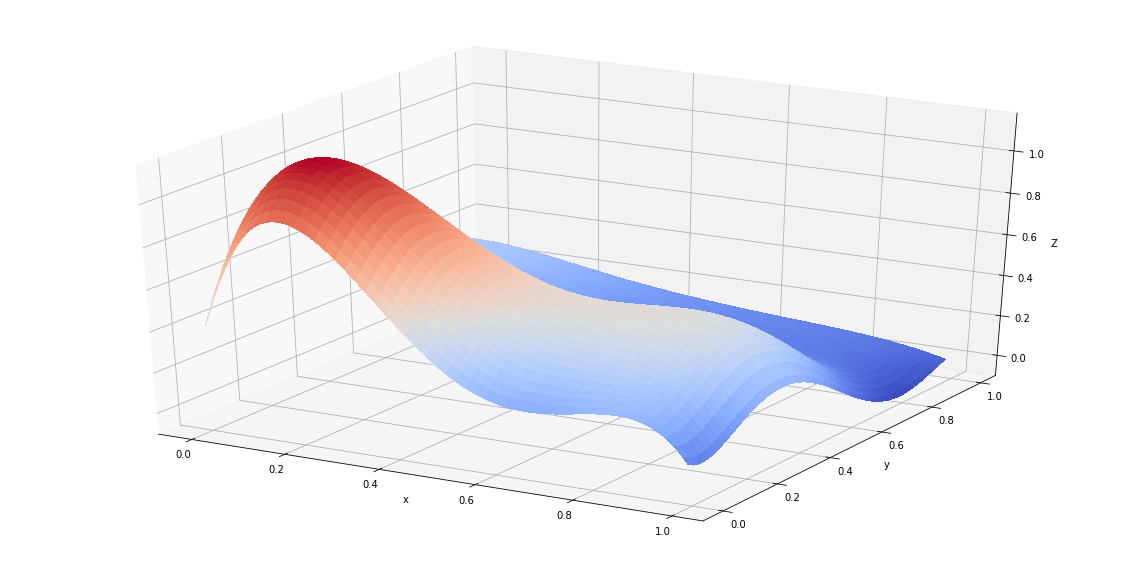

In [6]:
beta1=np.median(betaMatrix[:,:,2],1)
z_pred=computeZpredict(xVector,yVector,beta1,5)
bias,var=computeBiasandVar(zPredictmatrix[:,:,2],zVector)
print('Bias^2 for the final model is: ' + str(bias))
print('Var for the final model is: ' + str(var))
for j,order in enumerate(polynom_oders):
    print('STATS of MSE for polynom order {} is:'.format(str(order)))
    print(stats.describe(statsMatrix[0,:,j]))
    print('STATS of R2score for polynom order {} is:'.format(str(order)))
    print(stats.describe(statsMatrix[1,:,j]))
    print('\n')
#plot
matrixSize=np.size(y,0)
zPredictReshape=np.reshape(z_pred,(matrixSize,matrixSize))
fig1=plotTheSurface(x,y,zPredictReshape)
fig1.show()
#fig1.savefig('olsFranke.png')
finalMSE=np.mean(statsMatrix[0,:,2])
print(finalMSE)
print(bias + var)
print(str(MSE(z_pred,zVector)))

In [ ]:
print(np.median(betaMatrix[:,:,2],1))
print(np.mean(betaMatrix[:,:,2],1))

In [ ]:
print(statsMatrix[:,:,2])

In [ ]:
#predictors = x_train.columns
dtype = ['1','x', 'y', 'x**2', 'x*y', 'y**2', \
                'x**3', 'x**2*y', 'x*y**2', 'y**3', \
                'x**4', 'x**3*y', 'x**2*y**2', 'x*y**3','y**4', \
               'x**5', 'x**4*y', 'x**3*y**2', 'x**2*y**3','x*y**4', 'y**5']
indexsort = np.argsort(beta1)
xlabel=list()
for index in indexsort:
    
    xlabel.append(dtype[index])

fig = plt.figure(figsize=(20,10))
plt.bar(xlabel,beta1[indexsort],width=0.4)
plt.xticks(rotation=90,fontsize='15')
plt.yticks(fontsize='15')
plt.show

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


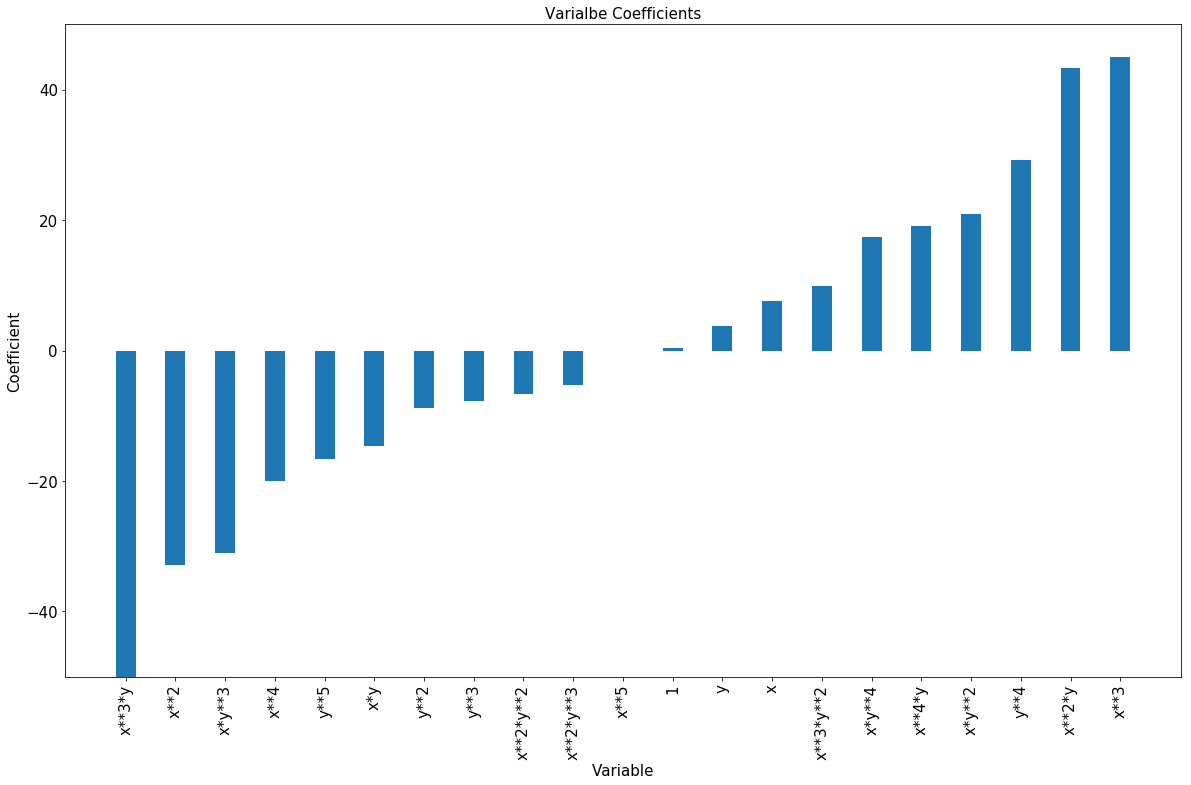

In [7]:
fig=plotcoefficients(beta1)
fig.show()
fig.savefig('coeffOLS.png')

In [ ]:
print(dtype)



In [ ]:
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.0001,normalize=True)
lassoreg.fit(xMatrix,zVector)
z_pred = lassoreg.predict(xMatrix)

In [ ]:
from sklearn.linear_model import Ridge
xMatrix=constructX(xVector,yVector,3)
ridgereg = Ridge(alpha=0.001,fit_intercept=True)
ridgereg.fit(xMatrix,zVector)
z_pred = ridgereg.predict(xMatrix)
print(MSE(zVector,z_pred))
print(r2score(zVector,z_pred))
print(ridgereg.coef_)
print(ridgereg.intercept_)

In [ ]:
beta,xx=Ridgeregression(xVector,yVector,zVector,3,0.001)
zPredictmatrix=computeZpredict(xVector,yVector,beta,3)
MSE1=MSE(zVector,zPredictmatrix)
r2score1=r2score(zVector,zPredictmatrix)
print(MSE1)
print(r2score1)
print(beta)

In [8]:
#printing results
lambda_values=[1e-3,1e-2,1e-1,1,10,1e2]
zPredictmatrix,statsMatrix,betaMatrix=ridge_regress(lambda_values,polynom_oders,xVector,yVector,zVector,numberOfFolds,folds,indeces)
for j,order in enumerate(polynom_oders):
    for  h,lbd in enumerate(lambda_values): 
        print(lbd)
        print('Average of MSE for polynom order {} is:'.format(str(order)) + str(np.mean(statsMatrix[0,:,h,j])))
        print('Average of R2score for polynom order {} is:'.format(str(order)) + str(np.mean(statsMatrix[1,:,h,j])))
        print('\n')

#beta1=np.mean(betaMatrix[:,:,0,2],1)
#z_pred=computeZpredict(xVector,yVector,beta1,5)
#bias,var=computeBiasandVar(zPredictmatrix[:,:,0,2],zVector)
#print('Bias for the final model is: ' + str(bias))
#print('Var for the final model is: ' + str(var))

#matrixSize=np.size(y,0)
#zPredictReshape=np.reshape(z_pred,(matrixSize,matrixSize))
#fig2=plotTheSurface(x,y,zPredictReshape)
#fig2.show()
#fig2.savefig('RidgeFranke.png',DPI=(200))  
#print(str(MSE(z_pred,zVector)))
#print(bias + var)

0.001
Average of MSE for polynom order 3 is:0.008147492995421852
Average of R2score for polynom order 3 is:0.9016115098828956


0.01
Average of MSE for polynom order 3 is:0.008148248437007297
Average of R2score for polynom order 3 is:0.9016032913737636


0.1
Average of MSE for polynom order 3 is:0.008217955287400786
Average of R2score for polynom order 3 is:0.9007690983085969


1
Average of MSE for polynom order 3 is:0.010220427520470384
Average of R2score for polynom order 3 is:0.8766082114937157


10
Average of MSE for polynom order 3 is:0.01615925190729883
Average of R2score for polynom order 3 is:0.8049000868595246


100.0
Average of MSE for polynom order 3 is:0.02350135267276062
Average of R2score for polynom order 3 is:0.7165847528500973


0.001
Average of MSE for polynom order 4 is:0.004380338512291158
Average of R2score for polynom order 4 is:0.9470946300966595


0.01
Average of MSE for polynom order 4 is:0.004706299711745436
Average of R2score for polynom order 4 is:0.94315903

In [9]:
beta1=np.median(betaMatrix[:,:,0,2],1)
z_pred=computeZpredict(xVector,yVector,beta1,5)
bias,var=computeBiasandVar(zPredictmatrix[:,:,0,2],zVector)
print('Bias^2 for the final model is: ' + str(bias))
print('Var for the final model is: ' + str(var))

finalMSE=np.mean(statsMatrix[0,:,2])
print(finalMSE)
print(bias + var)


Bias^2 for the final model is: 0.0027539474187907066
Var for the final model is: 4.4222301565744276e-07
0.007035840052276336
0.002754389641806364


/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


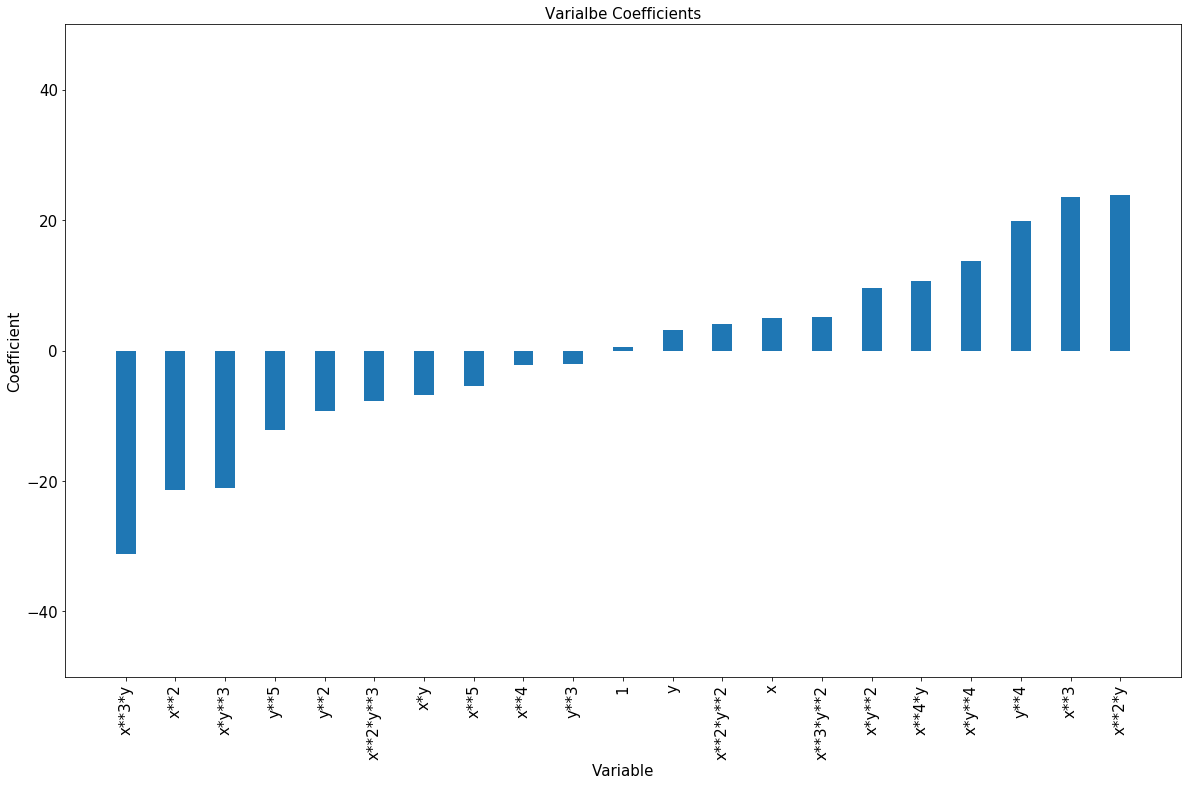

In [11]:
fig2=plotcoefficients(beta1)
fig2.show()
fig2.savefig('coeffRidge.png')

In [ ]:
beta2=np.median(betaMatrix[:,:,4,2],1)
fig2=plotcoefficients(beta2)
fig2.show()

In [12]:
lambda_values=[1e-3,1e-2,1e-1,1,10,1e2]
zPredictmatrix,statsMatrix,betaMatrix=lassoRegress(lambda_values,polynom_oders,xVector,yVector,zVector,numberOfFolds,folds,indeces)
for j,order in enumerate(polynom_oders):
    for  h,lbd in enumerate(lambda_values): 
        print(lbd)
        print('Average of MSE for polynom order {} is:'.format(str(order)) + str(np.mean(statsMatrix[0,:,h,j])))
        print('Average of R2score for polynom order {} is:'.format(str(order)) + str(np.mean(statsMatrix[1,:,h,j])))
        print('\n')

0.001
Average of MSE for polynom order 3 is:0.018076281092834778
Average of R2score for polynom order 3 is:0.7817130304950334


0.01
Average of MSE for polynom order 3 is:0.025371706616281475
Average of R2score for polynom order 3 is:0.6936657877635437


0.1
Average of MSE for polynom order 3 is:0.08283263288608274
Average of R2score for polynom order 3 is:-0.00014302916440889213


1
Average of MSE for polynom order 3 is:0.08283263288608274
Average of R2score for polynom order 3 is:-0.00014302916440889213


10
Average of MSE for polynom order 3 is:0.08283263288608274
Average of R2score for polynom order 3 is:-0.00014302916440889213


100.0
Average of MSE for polynom order 3 is:0.08283263288608274
Average of R2score for polynom order 3 is:-0.00014302916440889213


0.001
Average of MSE for polynom order 4 is:0.014317718345977518
Average of R2score for polynom order 4 is:0.8271091870158596


0.01
Average of MSE for polynom order 4 is:0.025371706616281475
Average of R2score for polynom ord

In [13]:
beta1=np.mean(betaMatrix[:,:,0,2],1)
z_pred=computeZpredict(xVector,yVector,beta1,5)
bias,var=computeBiasandVar(zPredictmatrix[:,:,0,2],zVector)
print('Bias for the final model is: ' + str(bias))
print('Var for the final model is: ' + str(var))
matrixSize=np.size(y,0)
zPredictReshape=np.reshape(z_pred,(matrixSize,matrixSize))
#fig2=plotTheSurface(x,y,zPredictReshape)
#fig2.show()
#fig2.savefig('LassoFranke.png')
print(str(MSE(z_pred,zVector)))
print(bias + var)

Bias for the final model is: 0.013523410326273163
Var for the final model is: 4.2762467009121583e-07
0.013523410326273163
0.013523837950943253


/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


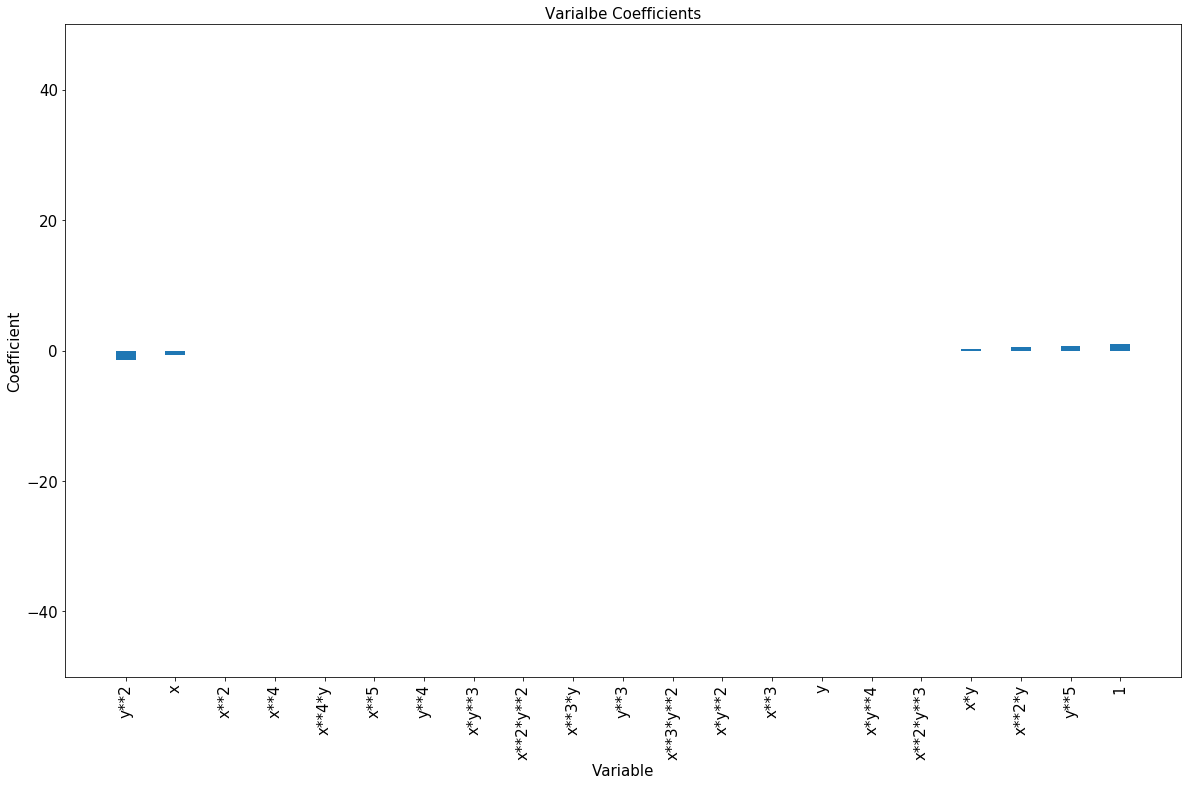

In [14]:
fig2=plotcoefficients(beta1)
fig2.show()
fig2.savefig('coeffLasso.png')

In [ ]:
### Using Lasso CV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold
alphas=[1e-3,1e-2,1e-1,1,10,1e2]
X=constructX(xVector,yVector,5)
reg = LassoCV(alphas=alphas,cv=10, random_state=0).fit(X, zVector)
print(reg.score(X, zVector))
#k_fold = KFold(3)



In [ ]:
z_pred=reg.predict(X)

In [ ]:
print(z_pred)

In [ ]:
matrixSize=np.size(y,0)
zPredictReshape=np.reshape(z_pred,(matrixSize,matrixSize))
fig1=plotTheSurface(x,y,zPredictReshape)
fig1.show()

In [ ]:
print(reg.alpha_)

In [ ]:
def lassoRegress11(lambda_values,polynom_oders,xVector,yVector,zVector,numberOfFolds,folds,indeces):
    from sklearn.linear_model import Lasso 
    from sklearn.metrics import mean_squared_error, r2_score


    numOfLambdas=len(lambda_values)
    sizeVector=np.size(zVector)
    numOfoders=len(polynom_oders)
    statsMatrix=np.zeros((2,numberOfFolds,numOfLambdas,numOfoders))
    zPredictmatrix=np.zeros((sizeVector,numberOfFolds,numOfLambdas,numOfoders))
    betaMatrix=np.zeros((21,numberOfFolds,numOfLambdas,numOfoders))
    for j,order in enumerate(polynom_oders):
        XMatrix=constructX(xVector,yVector,order)
        for i in range(numberOfFolds):
            #print(i)
            test1=folds[i]
            train1= trainSetindex(indeces,test1)
            for  h,lbd in enumerate(lambda_values):           
                #beta,XXinv=Ridgeregression(xVector[train1],yVector[train1],zVector[train1],order,lbd)
        #zPredict=computeZpredict(xVector[test1],yVector[test1],beta,3)
            
                lasso=Lasso(lbd,max_iter=1500,fit_intercept=True)
                lasso.fit(XMatrix[train1,:],zVector[train1])
                zPredictmatrix[:,i,h,j]=lasso.predict(XMatrix)
                beta=lasso.coef_
                betaMatrix[0:len(beta),i,h,j]=beta
                betaMatrix[0,i,h,j]=lasso.intercept_
                #zPredictmatrix[:,i,h,j]=computeZpredict(xVector,yVector,beta,order)
                statsMatrix[0,i,h,j]=mean_squared_error(zVector[test1],zPredictmatrix[test1,i,h,j])
                statsMatrix[1,i,h,j]=r2_score(zVector[test1],zPredictmatrix[test1,i,h,j])
    return zPredictmatrix,statsMatrix,betaMatrix


